Dataset: https://project-gurukul.s3.ap-south-1.amazonaws.com/machine-learning/food-classification.zip is used for the CNN model
because images in Dataset: https://www.kaggle.com/datasets/dansbecker/food-101 (prescribed by Prodigy) are somehow may not be in correct image format.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# TASK 01 - Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.
# TASK 02 - Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.
# TASK 03 - Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.
# TASK 04 - Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.
# TASK 05 - Develop a model that can accurately recognize food items from images and estimate their calorie content, enabling users to track their dietary intake and make informed food choices.

# <h><center><b>**Prodigy InfoTech Internship Program**</b></center></h>
### <h><center><b>**TASK 05 - Food Classification**</b></center></h>

**GitHub Repository-** **https://github.com/anweshabose/PRODIGY_ML_05**

<h1><b>Food Classification using CNN</b></h1>

![](https://p4.wallpaperbetter.com/wallpaper/667/254/333/vegetables-fruit-still-life-food-wallpaper-preview.jpg)

# **Data Set Problems** 🤔

👉 Develop a model that can accurately **recognize food items** from images and **estimate their calorie content**, enabling users to track their dietary intake and make informed food choices.

---

👨‍💻 **The machine learning models used in this project are:**
1. Convolution Neural Network(CNN)

# **Project Outline**

**Steps that we follow:**

- Installing and importing all the required libraries.
- configuration
- Version of Tensorflow
- Data Preprocessing & making the training and testing set
- Building the CNN structure
- Model Summary
- Training the CNN Model
- Graphical view of Accuracy and Loss of the CNN Model
- Saving the Model
- Loading the Model
- Model Summary
- Making prediction on new data (single prediction)

# Installing and importing all the required libraries

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import cv2

# Configuration

In [ ]:
#config = ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.5
#config.gpu_options.allow_growth = True
#session = InteractiveSession(config=config)

# Version of Tensorflow

In [ ]:
tf.__version__

'2.18.0'

# Data Preprocessing & making the training and testing set

In [3]:
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Food_Classification_Dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 791 images belonging to 9 classes.


In [4]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Food_Classification_Dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 921 images belonging to 9 classes.


# Building the CNN structure

# *CNN (Convolutional Neural Networks)*
![](https://projectgurukul.org/wp-content/uploads/2022/08/cnn-convolutional-neural-networks.webp)

In [5]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Making the Convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Making the Pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# To avoid overfitting
cnn.add(tf.keras.layers.Dropout(0.5))

# Making the Flattening layer
cnn.add(tf.keras.layers.Flatten())

# Making the Hidden layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Making the Output layer (for normal CNN)
# cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # For Binary Classification of normal CNN
cnn.add(tf.keras.layers.Dense(units=9, activation='softmax')) # For Multiple Classification of normal CNN

# Making the Output layer (using SVM in CNN)
# cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='linear')) # For Binary Classification of using SVM in CNN
# cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')) # For Multiple Classification of using SVM in CNN

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# *Fully Connected Layer*
![](https://projectgurukul.org/wp-content/uploads/2022/08/cnn-fully-connected.webp)

# Model Summary

In [6]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 273,577 (1.04 MB)

 Trainable params: 273,577 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

# Training the CNN Model

In [10]:
# For normal CNN
# cnn.compile(loss='bimary_crossentropy', optimizer='adam', metrics=['accuracy']) # For Binary Classification for normal CNN
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # For Multiple Classification for normal CNN

# For SVM in CNN
# cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy']) # For Binary Classification of using SVM in CNN
# cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy']) # For Multiple Classification of using SVM in CNN

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 714ms/step - accuracy: 0.5230 - loss: 1.3776 - val_accuracy: 0.2780 - val_loss: 1.8672
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 486ms/step - accuracy: 0.5397 - loss: 1.3237 - val_accuracy: 0.2704 - val_loss: 2.0545
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 667ms/step - accuracy: 0.5519 - loss: 1.2817 - val_accuracy: 0.3561 - val_loss: 1.7138
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 489ms/step - accuracy: 0.5681 - loss: 1.2721 - val_accuracy: 0.3105 - val_loss: 1.9039
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 496ms/step - accuracy: 0.5305 - loss: 1.2749 - val_accuracy: 0.2649 - val_loss: 2.0912
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 675ms/step - accuracy: 0.5632 - loss: 1.2810 - val_accuracy: 0.2628 - val_loss: 2.1268
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 486ms/step - accuracy: 0.5933 - loss: 1.1831 - val_accuracy: 0.2367 - val_loss: 2.1932
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 497ms/step - accuracy: 0.5918 - loss: 1.1768 - val_accu

# Graphical view of Accuracy and Loss of the CNN Model

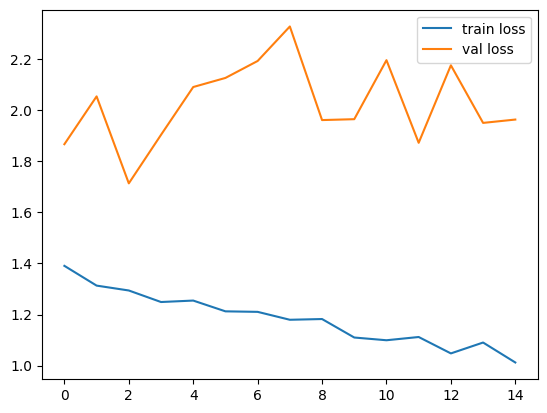

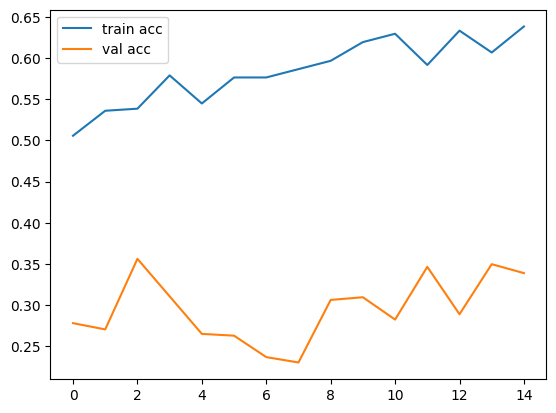

<Figure size 640x480 with 0 Axes>

In [11]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Saving the Model

In [12]:
# save it as a h5 file
cnn.save('model_r_which_food.h5')

# Loading the Model

In [13]:
# load model
model = load_model('model_r_which_food.h5')

# Model Summary

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 273,579 (1.04 MB)

 Trainable params: 273,577 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# Making prediction on new data (single prediction)

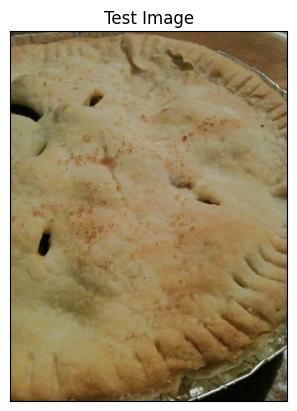

In [22]:
# Load image using Keras
test_image = image.load_img('/content/drive/MyDrive/Food_Classification_Dataset/test/apple_pie/101251.jpg')

# Convert image to NumPy array
test_image = image.img_to_array(test_image)

# Convert the format to match OpenCV (BGR)
test_image = test_image.astype(np.uint8)

# Display the image
plt.imshow(test_image)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [23]:
test_image = image.load_img('/content/drive/MyDrive/Food_Classification_Dataset/test/apple_pie/101251.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [24]:
print(result)

[[0.6879422  0.00618886 0.16796052 0.01761135 0.01732753 0.00101763
  0.04821401 0.00198731 0.05175054]]


In [25]:
class_names = list(test_set.class_indices.keys())
print(class_names)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding']


In [26]:
result_index = np.argmax(result)
print(result_index)

0


In [27]:
#Single image Prediction
print("It's a {}".format(class_names[result_index]))

It's a apple_pie
